# **⭐ Thyroid Disease Prediction**

In [1]:
from io import IncrementalNewlineDecoder
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':[20,20]},font_scale=1.4)

In [2]:
# import data
df = pd.read_csv('https://www.dropbox.com/s/dut0pljmwr9do2l/ThyroidDisease.csv?dl=1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [8]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,0
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,0
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,0
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,0
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,0


In [9]:
df['binaryClass'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64>

In [7]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":0})

In [ ]:
df['pregnant'].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [ ]:
df=df.replace({"t":0,"f":0})

In [ ]:
df['sex'].isnull().sum()

0

In [ ]:
df["TBG"].value_counts()

?    3772
Name: TBG, dtype: int64

In [ ]:
del df['TBG']

In [ ]:
df=df.replace({"?":np.NAN})

In [ ]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [ ]:
df["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [ ]:
df=df.replace({"F":1,"M":0})

In [ ]:
df["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [ ]:
del df["referral source"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [ ]:
df["T3 measured"].value_counts()

0    3772
Name: T3 measured, dtype: int64

In [ ]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [ ]:
cols=df.columns[df.dtypes.eq('object')]
df[cols]=df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [ ]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [ ]:
df['T4U measured'].mean()

0.0

In [ ]:
df['T4U measured'].fillna(df['T4U measured'].mean(), inplace=True)

In [ ]:
df['sex'].fillna(df['sex'].mean(), inplace=True)

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [ ]:
df['TSH'] = imputer.fit_transform(df[['TSH']])
df['T3'] = imputer.fit_transform(df[['T3']])
df['TT4'] = imputer.fit_transform(df[['TT4']])
df['T4U'] = imputer.fit_transform(df[['T4U']])
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [ ]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [ ]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,0,2.5000,0,125.000000,0,1.140,0,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0000,0,102.000000,0,0.995,0,110.469649,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,109.000000,0,0.910,0,120.000000,0,0
3,70.0,1.0,0,0,0,0,0,0,0,0,...,0,1.9000,0,175.000000,0,0.995,0,110.469649,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0,1.2000,0,61.000000,0,0.870,0,70.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,0,2.1000,0,124.000000,0,1.080,0,114.000000,0,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,0,1.8000,0,112.000000,0,1.070,0,105.000000,0,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0000,0,82.000000,0,0.940,0,87.000000,0,0


In [ ]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


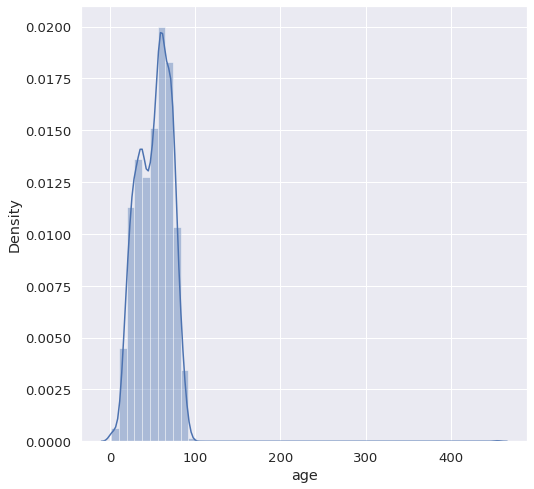

In [ ]:
sns.distplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


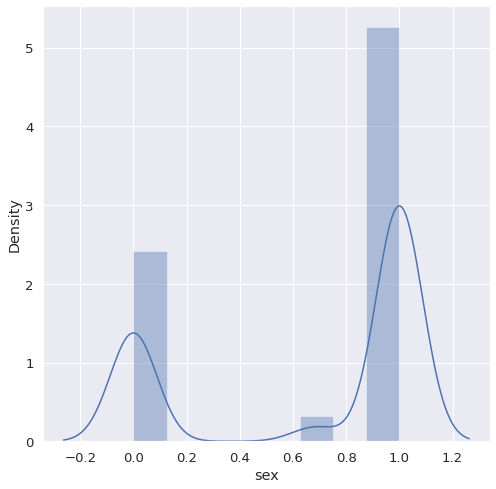

In [ ]:
sns.distplot(df['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


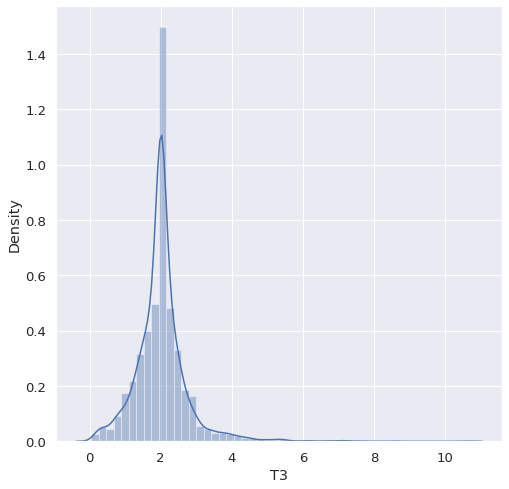

In [ ]:
sns.distplot(df['T3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


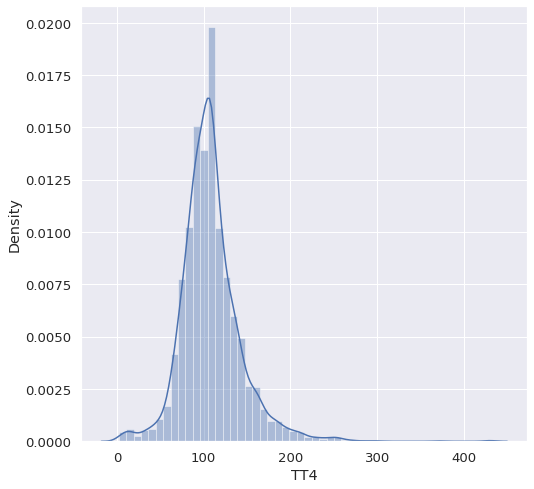

In [ ]:
sns.distplot(df['TT4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


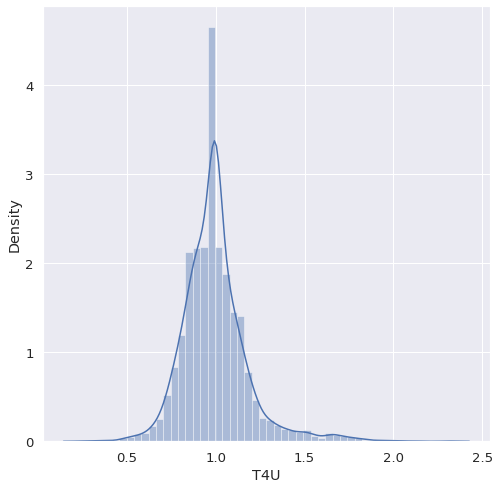

In [ ]:
sns.distplot(df['T4U'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


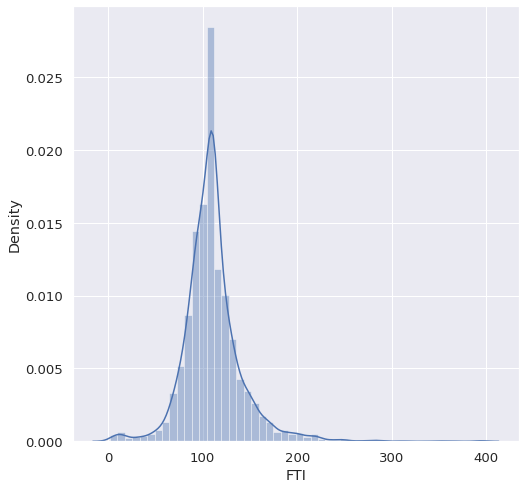

In [ ]:
sns.distplot(df['FTI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


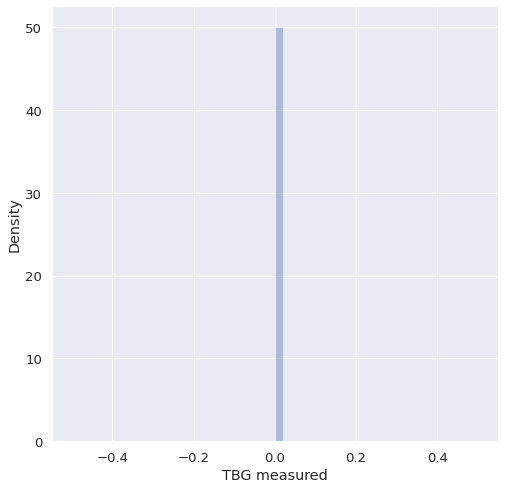

In [ ]:
sns.distplot(df['TBG measured'])

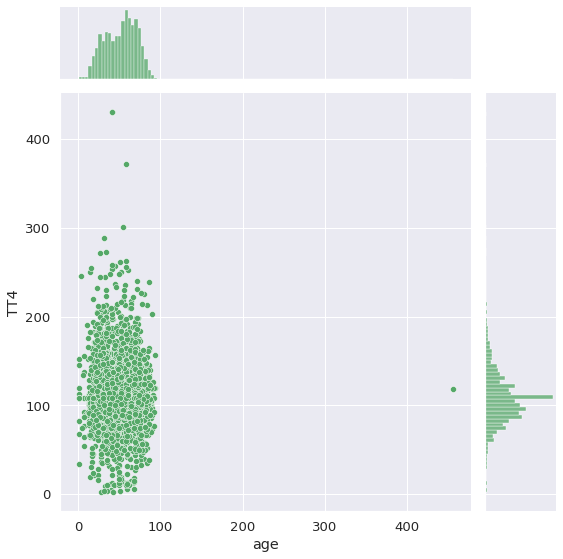

In [ ]:
sns.jointplot(x='age',y='TT4',data=df,kind='scatter',height=8,color='g')

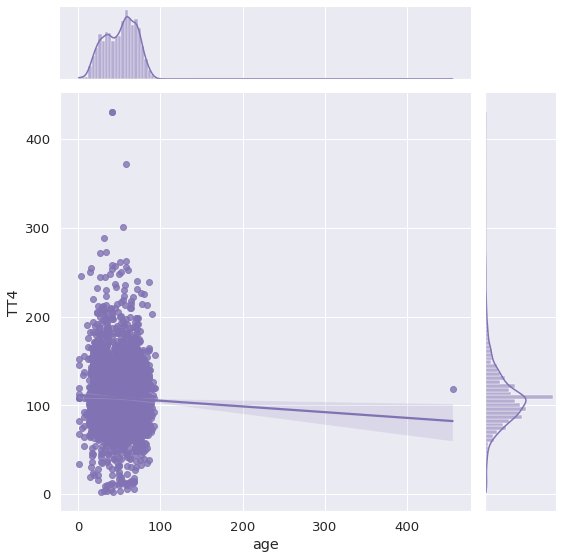

In [ ]:
sns.jointplot(x='age',y='TT4',data=df,kind='reg',height=8,color='m')

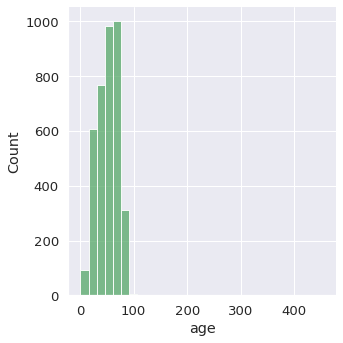

In [ ]:
sns.displot(df['age'],kde=False,bins=30,color='g')

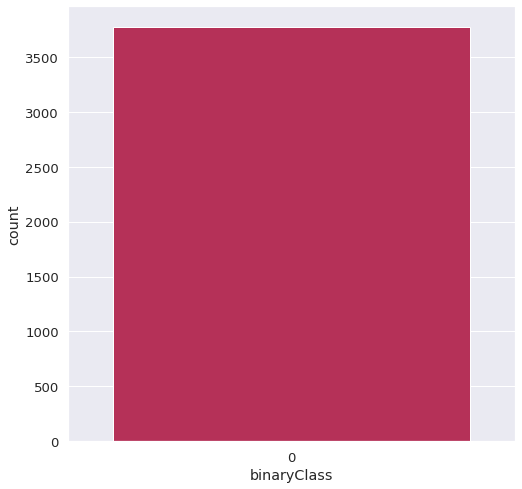

In [ ]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

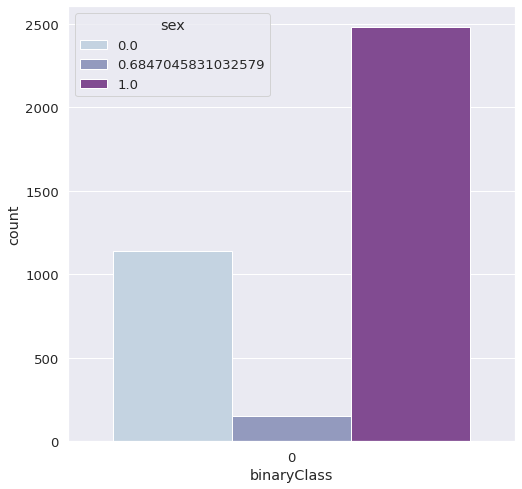

In [ ]:
sns.countplot(x='binaryClass',data=df,hue='sex',palette='BuPu')

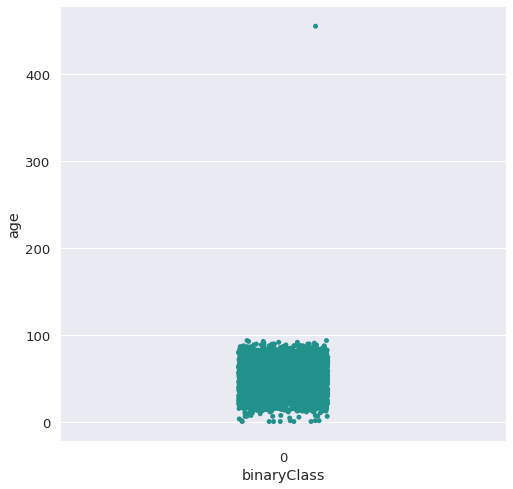

In [ ]:
sns.stripplot(x="binaryClass",y="age",data=df,palette="viridis")

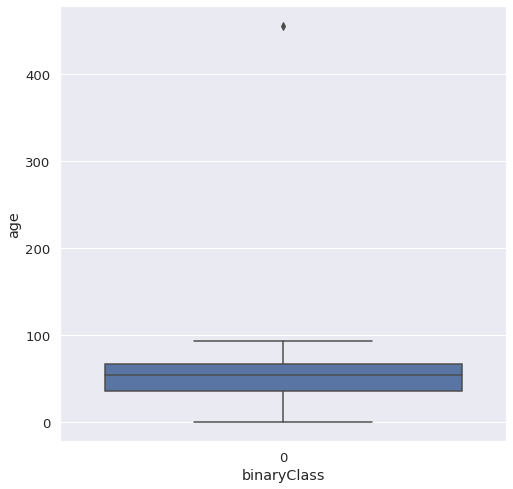

In [ ]:
sns.boxplot(x='binaryClass',y='age',data=df)

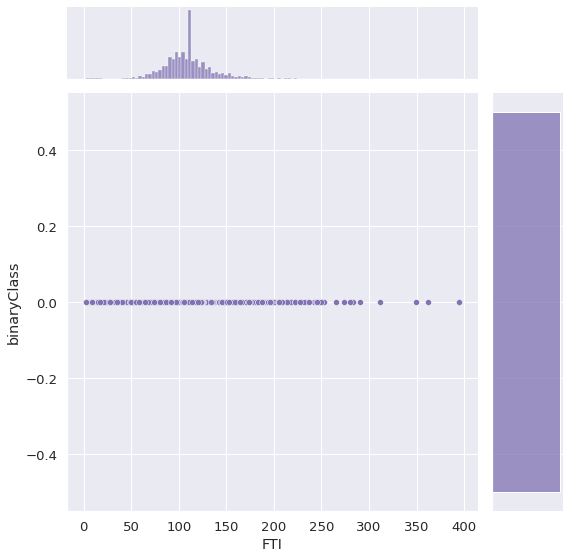

In [ ]:
sns.jointplot(x='FTI', y='binaryClass', data=df, kind='scatter', height=8, color='m')

In [ ]:
df_corr=df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,0.003606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.214925,NaN,-0.037609,NaN,-0.157523,NaN,0.050017,NaN,NaN
sex,0.003606,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.062759,NaN,0.166989,NaN,0.225572,NaN,0.038531,NaN,NaN
on thyroxine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
query on thyroxine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on antithyroid medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thyroid surgery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I131 treatment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
query hypothyroid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


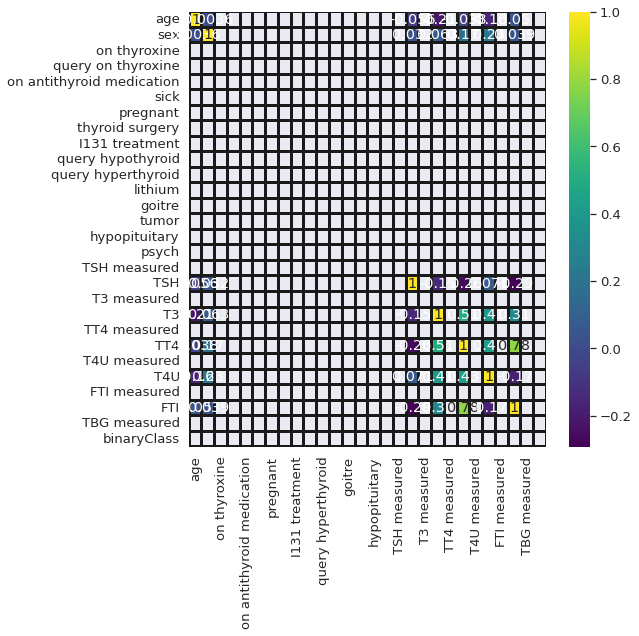

In [ ]:
sns.heatmap(df_corr,cmap='viridis',linecolor='k',linewidths=2,annot=True)

In [ ]:
x=df.drop('binaryClass',axis=1)
y=df['binaryClass']

In [ ]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.300000,0,2.5000,0,125.000000,0,1.140,0,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.100000,0,2.0000,0,102.000000,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,0,109.000000,0,0.910,0,120.000000,0
3,70.0,1.0,0,0,0,0,0,0,0,0,...,0.160000,0,1.9000,0,175.000000,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.720000,0,1.2000,0,61.000000,0,0.870,0,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,0,2.1000,0,124.000000,0,1.080,0,114.000000,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,5.100000,0,1.8000,0,112.000000,0,1.070,0,105.000000,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0.700000,0,2.0000,0,82.000000,0,0.940,0,87.000000,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64

In [ ]:
x = sm.add_constant(x)
results=sm.OLS(y,x).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1804: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            binaryClass   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 03 Sep 2022   Prob (F-statistic):                nan
Time:                        14:31:59   Log-Likelihood:                    inf
No. Observations:                3772   AIC:                              -inf
Df Residuals:                    3764   BIC:                              -inf
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                              0          0        nan        nan           0           0
age                                0          0        nan        nan           0           0
sex                                0          0        nan        nan           0           0
on thyroxine                       0          0        nan        nan           0           0
query on thyroxine                 0          0        nan        nan           0           0
on antithyroid medication          0          0        nan        nan           0           0
sick                               0          0        nan        nan           0           0
pregnant                           0          0        nan        nan           0           0
thyroid surgery                    0          0        nan        nan           0           0
I131 treatment                     0          0        nan        nan           0           0
query hypothyroid                  0          0        nan        nan           0           0
query hyperthyroid                 0          0        nan        nan           0           0
lithium                            0          0        nan        nan           0           0
goitre                             0          0        nan        nan           0           0
tumor                              0          0        nan        nan           0           0
hypopituitary                      0          0        nan        nan           0           0
psych                              0          0        nan        nan           0           0
TSH measured                       0          0        nan        nan           0           0
TSH                                0          0        nan        nan           0           0
T3 measured                        0          0        nan        nan           0           0
T3                                 0          0        nan        nan           0           0
TT4 measured                       0          0        nan        nan           0           0
TT4                                0          0        nan        nan           0           0
T4U measured                       0          0        nan        nan           0           0
T4U                                0          0        nan        nan           0           0
FTI measured                       0          0        nan        nan           0           0
FTI                                0          0        nan        nan           0           0
TBG measured                       0          0        nan        nan           0           0
==============================================================================
Omnibus:                     9575.564   Durbin-Watson:                     nan
Prob(Omnibu

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x.shape

(3772, 28)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
x.shape[1]

28

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               7424      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 63)                8127      
                                                                 
 dropout_11 (Dropout)        (None, 63)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

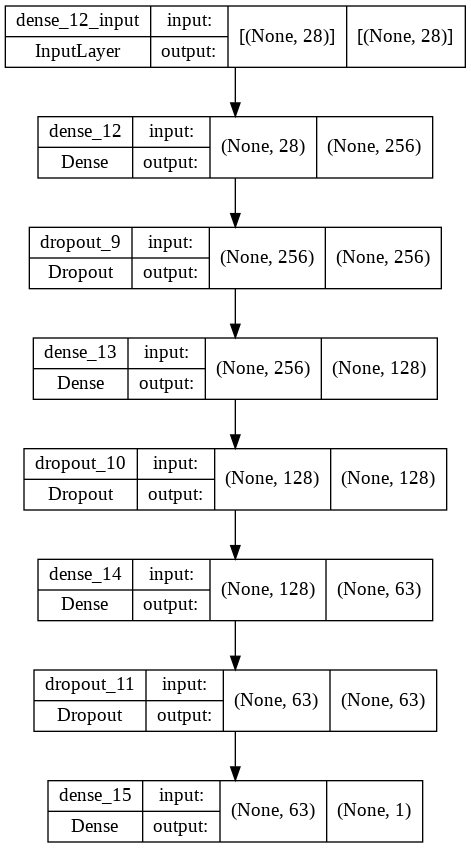

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 


In [ ]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.75,min_lr = 1e-10)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=20)

In [ ]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 0.1231 - accuracy: 0.9925 - val_loss: 7.9272e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 5.0378e-04 - accuracy: 1.0000 - val_loss: 2.0975e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 2.5457e-04 - accuracy: 1.0000 - val_loss: 1.4202e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 1.9876e-04 - accuracy: 1.0000 - val_loss: 1.0000e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 1.5031e-04 - accuracy: 1.0000 - val_loss: 7.2840e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 1.1602e-04 - accuracy: 1.0000 - val_loss: 5.4714e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/100
40/40 [=============

In [ ]:
model.evaluate(x_test,y_test)

30/30 [==============================] - 0s 2ms/step - loss: 3.2935e-07 - accuracy: 1.0000


[3.293462498277222e-07, 1.0]

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[8.13282508e-09],
       [4.14474766e-09],
       [5.22342916e-08],
       [2.72087684e-14],
       [1.17028817e-10],
       [6.48565742e-14],
       [2.90143712e-12],
       [3.41008217e-07],
       [2.29320955e-11],
       [6.00524288e-08],
       [4.78501180e-12],
       [2.70926336e-07],
       [2.73822542e-09],
       [3.03503708e-19],
       [2.42077980e-09],
       [9.67957952e-17],
       [4.97292433e-07],
       [4.80005591e-09],
       [1.44777551e-10],
       [1.37610641e-07],
       [1.11506149e-15],
       [6.40578368e-10],
       [4.52625359e-09],
       [3.00492834e-12],
       [4.11293569e-11],
       [1.66108308e-10],
       [4.41246206e-10],
       [5.65990787e-12],
       [1.71102723e-08],
       [9.96222216e-10],
       [9.19783416e-10],
       [5.07942716e-11],
       [2.70613046e-11],
       [9.94250862e-12],
       [2.08453121e-09],
       [1.13367365e-19],
       [2.87784250e-08],
       [9.45312877e-07],
       [1.05016114e-13],
       [5.26379417e-12],


In [ ]:
y_pred[1]

array([4.1447477e-09], dtype=float32)

In [ ]:
y_test

270     0
2071    0
3660    0
3207    0
1675    0
       ..
1791    0
2132    0
162     0
1885    0
219     0
Name: binaryClass, Length: 943, dtype: int64

In [ ]:
%%time
model.evaluate(x_test,y_test)

30/30 [==============================] - 0s 1ms/step - loss: 3.2935e-07 - accuracy: 1.0000
CPU times: user 115 ms, sys: 2.17 ms, total: 117 ms
Wall time: 121 ms


[3.293462498277222e-07, 1.0]

In [ ]:
model.predict(x_test)[50]

array([5.8884986e-18], dtype=float32)

In [ ]:
y_test.iloc[50]

0

In [ ]:
model.predict(x_test)[70]

array([0.500784], dtype=float32)

In [ ]:
y_test.iloc[70]

0

In [ ]:
model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.8627688]], dtype=float32)